In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **TASK 1(EDA)**

In [ ]:
df_cust = pd.read_csv('/content/drive/MyDrive/zeo_tap/Customers.csv', parse_dates=['SignupDate'])
df_prod = pd.read_csv('/content/drive/MyDrive/zeo_tap/Products.csv')
df_trans = pd.read_csv('/content/drive/MyDrive/zeo_tap/Transactions.csv', parse_dates=['TransactionDate'])

In [ ]:
df_cust.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [ ]:
df_prod.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [ ]:
df_trans.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [ ]:
df_cust.shape

(200, 4)

In [ ]:
df_trans.shape

(1000, 7)

In [ ]:
df_prod.shape

(100, 4)

In [ ]:
df_cust.describe()

,SignupDate
count,200
mean,2023-07-19 08:31:12
min,2022-01-22 00:00:00
25%,2022-09-26 12:00:00
50%,2023-08-31 12:00:00
75%,2024-04-12 12:00:00
max,2024-12-28 00:00:00


In [ ]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB


In [ ]:
df_prod.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [ ]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [ ]:
df_trans.describe()

,TransactionDate,Quantity,TotalValue,Price
count,1000,1000.000000,1000.000000,1000.00000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000
std,NaN,1.117981,493.144478,140.73639


In [ ]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB


In [ ]:
df_cust.isnull().sum()

,0
CustomerID,0
CustomerName,0
Region,0
SignupDate,0


In [ ]:
df_prod.isnull().sum()

,0
ProductID,0
ProductName,0
Category,0
Price,0


In [ ]:
df_trans.isnull().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0


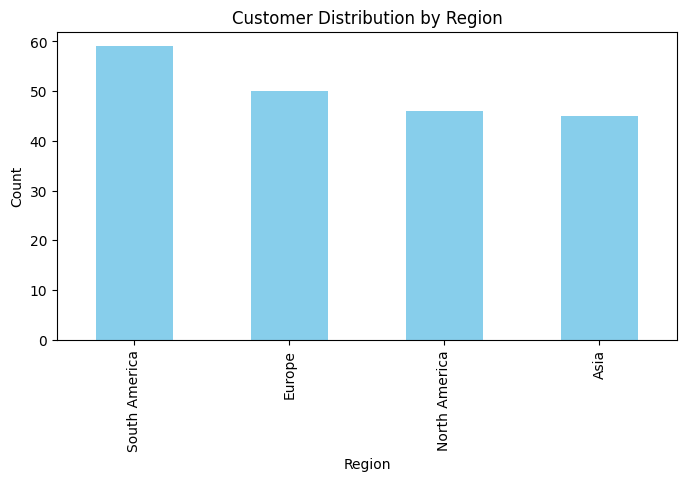

In [ ]:
plt.figure(figsize=(8, 4))
df_cust['Region'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

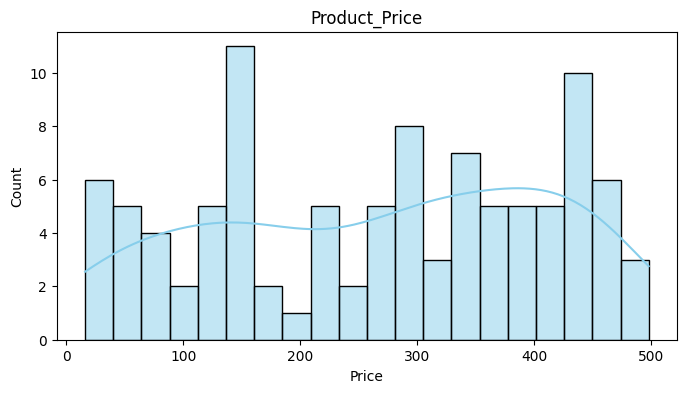

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df_prod['Price'], bins=20, kde=True, color='skyblue')
plt.title('Product_Price')
plt.show()

In [ ]:
df_trans_prod = pd.merge(df_trans, df_prod, on='ProductID', how='left')

In [ ]:
df_trans_prod_cust = pd.merge(df_trans_prod, df_cust, on='CustomerID', how='left')

In [ ]:
df_trans_prod_cust.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15


In [ ]:
df_trans_prod_cust.describe()

,TransactionDate,Quantity,TotalValue,Price_x,Price_y,SignupDate
count,1000,1000.000000,1000.000000,1000.00000,1000.00000,1000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407,272.55407,2023-07-09 02:49:55.199999744
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000,16.08000,2022-01-22 00:00:00
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000,147.95000,2022-09-17 12:00:00
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000,299.93000,2023-07-23 00:00:00
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000,404.40000,2024-04-12 00:00:00
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000,497.76000,2024-12-28 00:00:00
std,NaN,1.117981,493.144478,140.73639,140.73639,NaN


In [ ]:
price_diff = df_trans_prod_cust[df_trans_prod_cust['Price_x'] != df_trans_prod_cust['Price_y']]
print(f"Rows with price mismatches: {len(price_diff)}")

Rows with price mismatches: 0


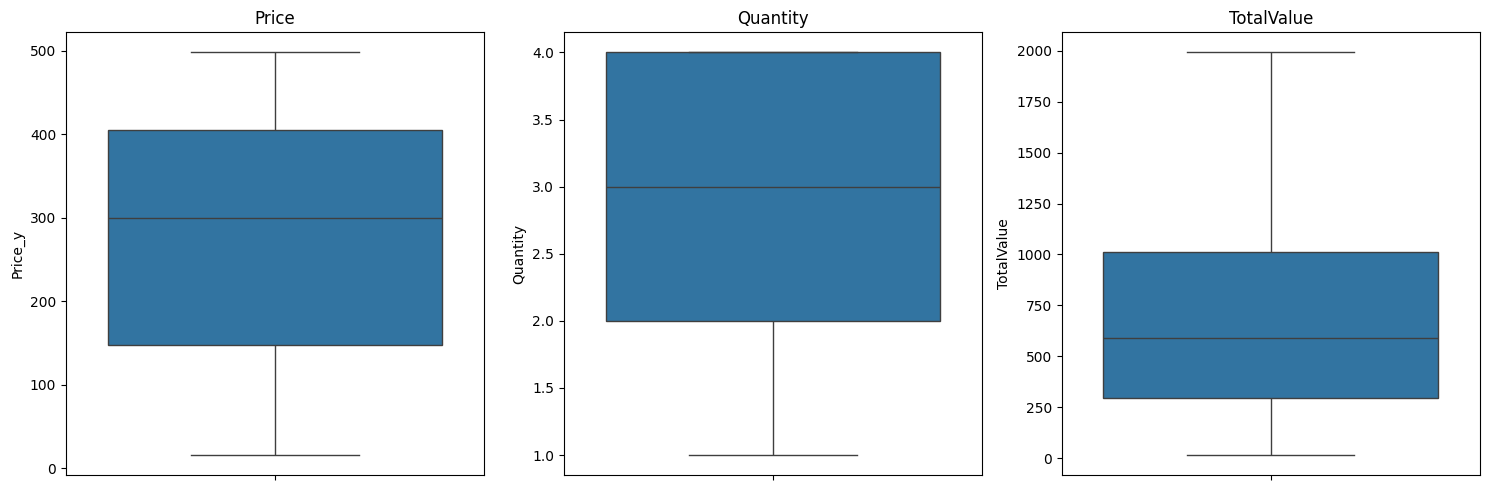

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=df_trans_prod_cust, y='Price_y')
plt.title('Price')

plt.subplot(1, 3, 2)
sns.boxplot(data=df_trans_prod_cust, y='Quantity')
plt.title('Quantity')

plt.subplot(1, 3, 3)
sns.boxplot(data=df_trans_prod_cust, y='TotalValue')
plt.title('TotalValue')

plt.tight_layout()
plt.show()


In [ ]:
def find_out(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

price_out = find_out(df_trans_prod_cust, 'Price_y')
qty_out = find_out(df_trans_prod_cust, 'Quantity')
totalval_out = find_out(df_trans_prod_cust, 'TotalValue')

print(f"Price Outliers: {len(price_out)}")
print(f"Quantity Outliers: {len(qty_out)}")
print(f"TotalValue Outliers: {len(totalval_out)}")

Price Outliers: 0
Quantity Outliers: 0
TotalValue Outliers: 0


<ipython-input-31-fffc07c4c5ce>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dist.values, y=dist.index, palette='viridis')


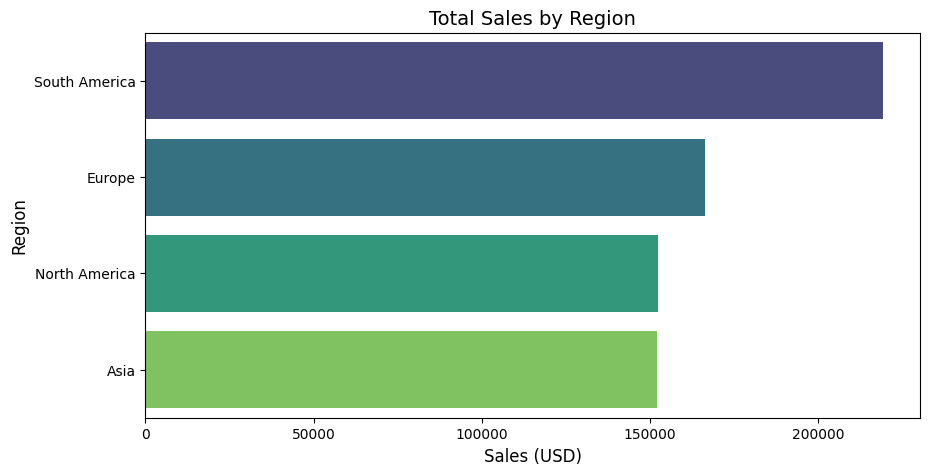

In [ ]:
plt.figure(figsize=(10, 5))
dist = df_trans_prod_cust.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
sns.barplot(x=dist.values, y=dist.index, palette='viridis')
plt.title('Total Sales by Region', fontsize=14)
plt.xlabel('Sales (USD)', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.show()

<ipython-input-32-f4ef199e2255>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=per_cat.values, y=per_cat.index, palette='rocket')


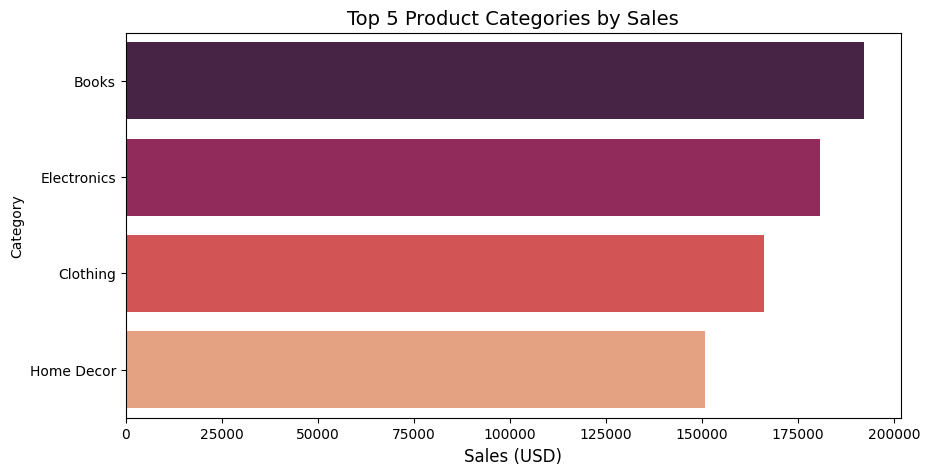

In [ ]:
plt.figure(figsize=(10, 5))
per_cat = df_trans_prod_cust.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)[:5]
sns.barplot(x=per_cat.values, y=per_cat.index, palette='rocket')
plt.title('Top 5 Product Categories by Sales', fontsize=14)
plt.xlabel('Sales (USD)', fontsize=12)
plt.show()

<ipython-input-33-9ffdd22e9a2f>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_trans_prod_cust.resample('M', on='TransactionDate')['TotalValue'].sum()


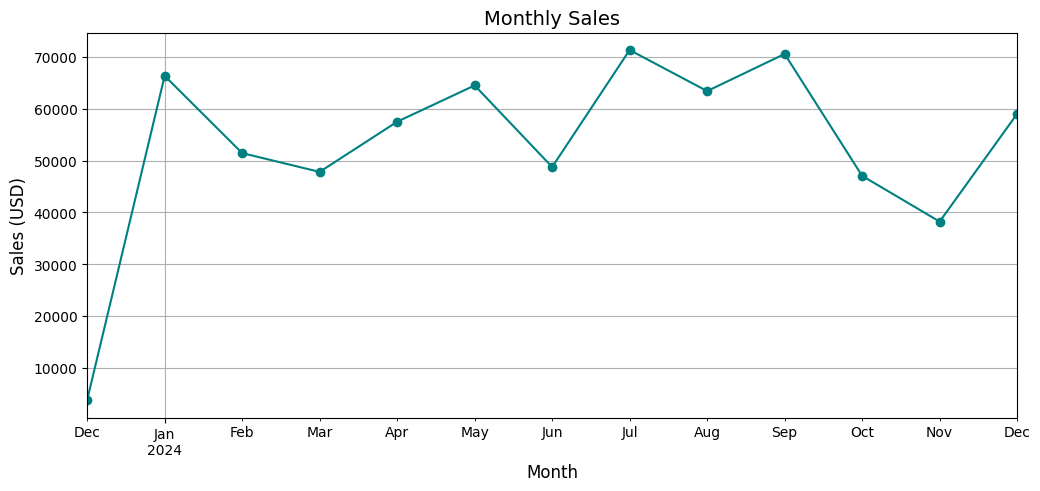

In [ ]:
monthly_sales = df_trans_prod_cust.resample('M', on='TransactionDate')['TotalValue'].sum()
plt.figure(figsize=(12, 5))
monthly_sales.plot(marker='o', color='teal')
plt.title('Monthly Sales', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales (USD)', fontsize=12)
plt.grid(True)
plt.show()

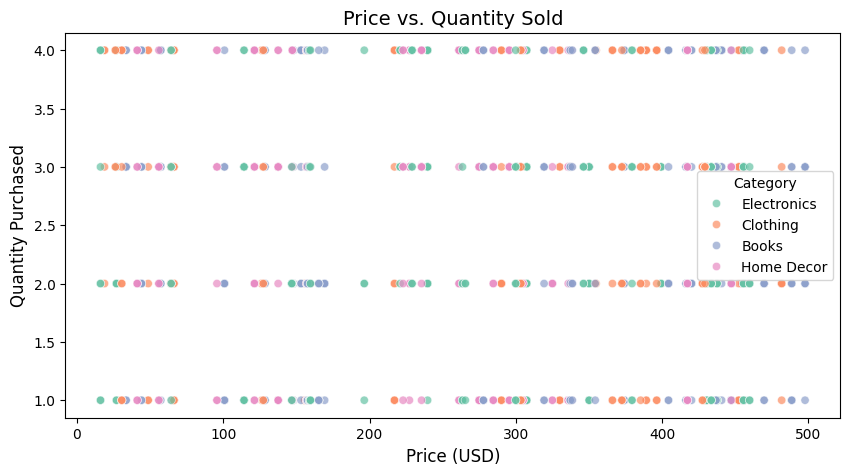

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_trans_prod_cust, x='Price_x', y='Quantity', hue='Category', palette='Set2', alpha=0.7)
plt.title('Price vs. Quantity Sold', fontsize=14)
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Quantity Purchased', fontsize=12)
plt.show()

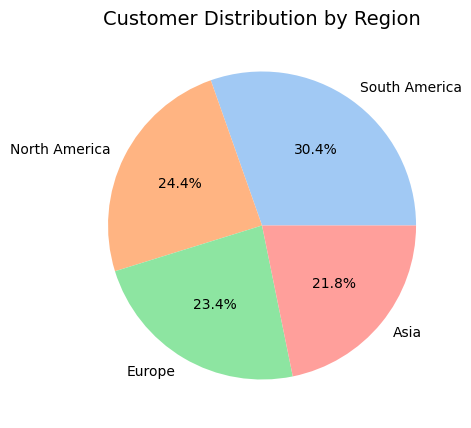

In [ ]:
plt.figure(figsize=(10, 5))
region_counts = df_trans_prod_cust['Region'].value_counts()
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Customer Distribution by Region', fontsize=14)
plt.show()